# Stereo panning random melody

This example creates a repeating meldoy that oscillates between the left and right audio channel. We:

- define a melody as a list of frequencies
- generate equal length sine oscillations with those frequencies
- use a cosine (and its inverted values) to weight the amplitude array on the left (and right) channel

In [1]:
# this just adds the parent directory (where wavestacker is) to module search path
import sys
module_path = f'{sys.path[0]}/..'
if not module_path in sys.path: sys.path.append(module_path)

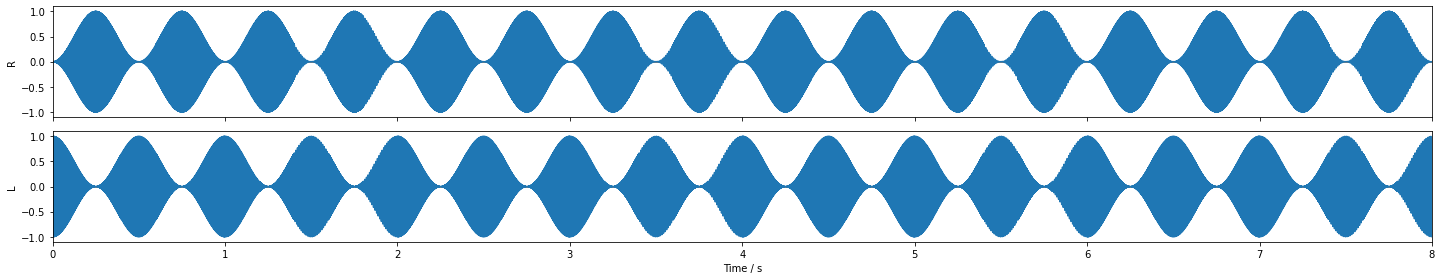

In [9]:
import wavestacker
import numpy as np

def generate_sine_wave(frequency, duration, sample_rate):
    time_array = np.linspace(0, duration, int(sample_rate * duration))
    sine_wave = np.sin(2 * np.pi * frequency * time_array)
    return sine_wave

sample_rate = 44100  # Sample rate in Hz
buffer = wavestacker.StereoAudioBuffer(sample_rate=sample_rate)

# Generate large arrays of sine waves with different frequencies
frequencies = [440, 880, 220, 880, 440, 220, 1760, 110, 1760, 110] * 4 # repeat 4 times
tone_length = 0.2  # seconds
notes = [generate_sine_wave(freq, tone_length, sample_rate) for freq in frequencies] 
y = np.concatenate(notes)

# Apply modulation 
time_array = np.linspace(0, tone_length*len(frequencies), int(sample_rate * tone_length * len(frequencies)))
channel0 = y * (( np.cos(2 * np.pi * 2 * time_array) / 2) + .5)
channel1 = y * ((-np.cos(2 * np.pi * 2 * time_array) / 2) + .5)

buffer.add_audio_data(channel0, channel1)
fig, axs = buffer.plot()

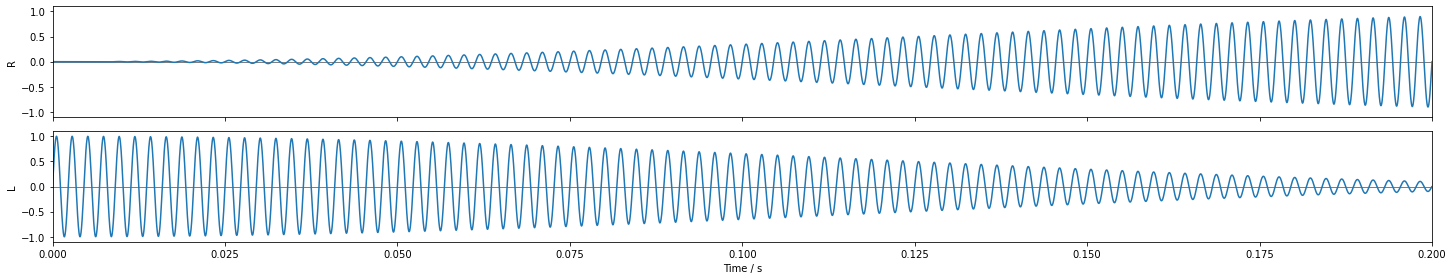

In [10]:
fig, axs = buffer.plot()
for ax in axs: ax.set_xlim(0,0.2)

You can listen to the result with:

In [ ]:
# buffer.play()